In [42]:
# Step 1: Import KaggleHub and download dataset

import kagglehub

path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-in-exams


In [43]:
# Step 2: List downloaded files to confirm dataset presence

import os

files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['StudentsPerformance.csv']


In [44]:
# Step 3: Load dataset using pandas

import pandas as pd
import os

csv_path = os.path.join(path, 'StudentsPerformance.csv')
df = pd.read_csv(csv_path)


In [45]:
# Step 4: Display the first 10 rows of the dataset

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [46]:
# Step 5: Display basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [47]:
# Step 6: Generate descriptive statistics

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [48]:
# Step 7: Check for missing values

df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [49]:
# Step 8: Analyze average scores by gender

df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [50]:
# Step 9: Analyze average scores by lunch type

df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [51]:
# Step 10: Analyze average scores by test preparation course

df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [52]:
# Step 11: Import seaborn for visualization

import seaborn as sns

In [53]:
# Step 12: Set seaborn style

sns.set(style="darkgrid")

/tmp/ipython-input-54-2194459331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


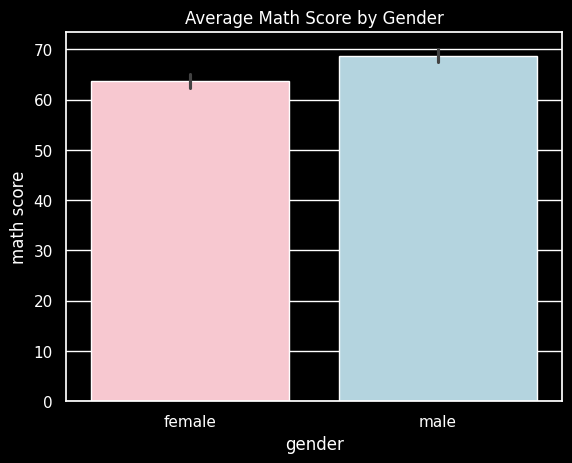

In [54]:
# Step 13: Plot average math score by gender

import matplotlib.pyplot as plt
plt.style.use('dark_background')  # Matplotlib style

sns.barplot(
    x='gender',
    y='math score',
    data=df,
    palette={'male': '#ADD8E6', 'female': 'pink'}  # light blue hex code
)
plt.title("Average Math Score by Gender")
plt.show()


In [55]:
# Import Matplotlib for Visualiation

import matplotlib.pyplot as plt

/tmp/ipython-input-56-3347883507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


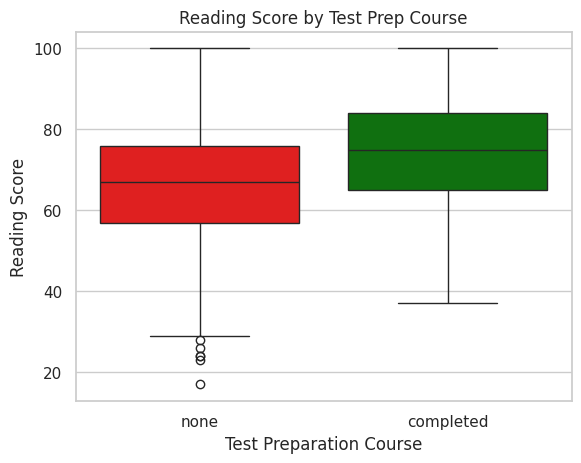

In [56]:
# Step 14: Box plot of reading scores by test preparation course

# Set white background with grid
sns.set(style="whitegrid")  # clean, white look with subtle grid

# Create the plot
sns.boxplot(
    x='test preparation course',
    y='reading score',
    data=df,
    palette={'completed': 'green', 'none': 'red'}  # custom colors
)

# Title and labels (optional)
plt.title("Reading Score by Test Prep Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Reading Score")

plt.show()


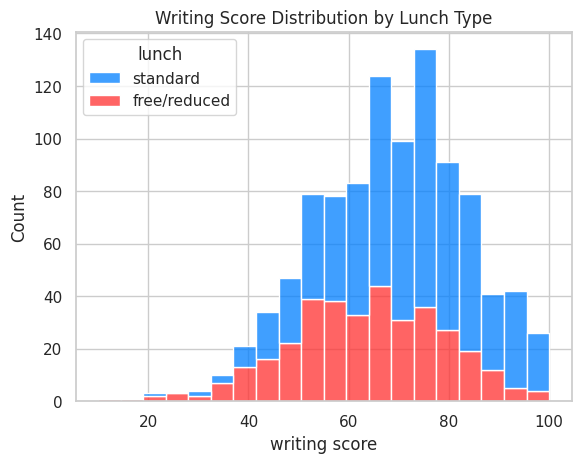

In [57]:
# Step 15: Histogram of writing scores grouped by lunch type

sns.histplot(
    data=df,
    x='writing score',
    hue='lunch',
    bins=20,
    multiple='stack',
    palette={'standard': '#007FFF', 'free/reduced': '#FF3030'} # or any pair above
)
plt.title("Writing Score Distribution by Lunch Type")
plt.show()

In [58]:
# Step 16: Summary of key insights

print("""
Key Insights:
1. Test Prep Course:
Students who completed the course scored 10–15 points higher across all subjects, highlighting its strong positive impact.

2. Lunch Type:
Students with standard lunch performed significantly better than those with free/reduced lunch, suggesting socioeconomic influence on scores.

3. Gender Trends:
Males scored higher in math.
Females outperformed in reading and writing.

4. Parental Education:
Higher parental education (bachelor’s/master’s) correlates with better student scores, especially in reading and writing.

5.Score Distribution:
Math scores show the widest variation, with some very low values, indicating it's the most challenging subject.
""")


Key Insights:
1. Test Prep Course:
Students who completed the course scored 10–15 points higher across all subjects, highlighting its strong positive impact.

2. Lunch Type:
Students with standard lunch performed significantly better than those with free/reduced lunch, suggesting socioeconomic influence on scores.

3. Gender Trends:
Males scored higher in math.
Females outperformed in reading and writing.

4. Parental Education:
Higher parental education (bachelor’s/master’s) correlates with better student scores, especially in reading and writing.

5.Score Distribution:
Math scores show the widest variation, with some very low values, indicating it's the most challenging subject.

